In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

##### <u>1. Decreasing Image Size</u><br>
Our image dimentions are too big, so let's decrease the image size:

In [2]:
# Taken from: https://stackoverflow.com/questions/44650888/resize-an-image-without-distortion-opencv
# Thanks to: thewaywewere
def image_resize(image, width = None, height = None, inter = cv.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized

In [3]:
# We can also use cv2 function to show the image
# cv.imshow('hi', template_image)
# cv.waitKey(0)

def showim(images, titles = []):
    print(len(images))
    if (len(images) == 1):
        f, ax = plt.subplots(figsize=(6 * len(images),6))
        ax.imshow(images[0], cmap='gray')
        ax.axis('off')
        if (len(titles) > 0):
            ax.title.set_text(titles[0])
    else:
        f, ax = plt.subplots(1,len(images),figsize=(6 * len(images),6))
        for i in range(0, len(images)):
            ax[i].imshow(images[i], cmap='gray')
            ax[i].axis('off')
            if (len(titles) > 0):
                ax[i].title.set_text(titles[i])
    plt.show()            

In [4]:
# Resize the template-image
image = cv.imread(r'template_pcb.jpg', 1)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
template_img = image_resize(image, height = 400)

# Resize the test-image
image = cv.imread(r'defected_pcb.jpg', 1)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
test_img = image_resize(image, height = 400)

2


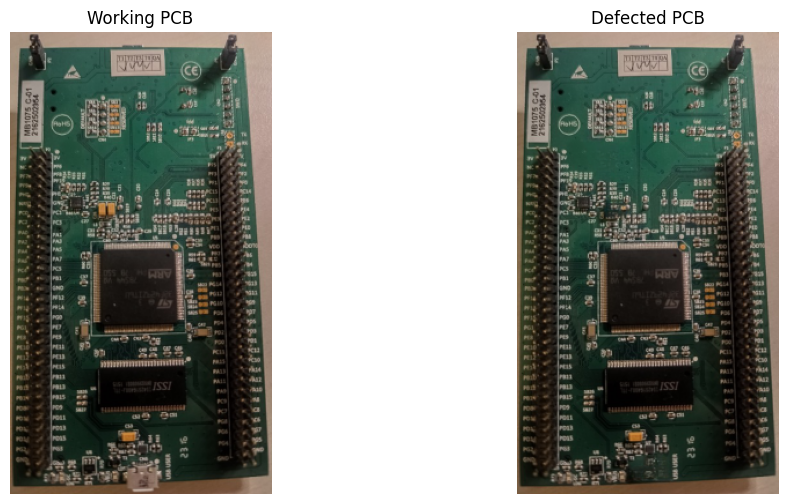

In [5]:
showim([template_img, test_img], ['Working PCB', 'Defected PCB'])

Let's convert the images to gray-scale:

2


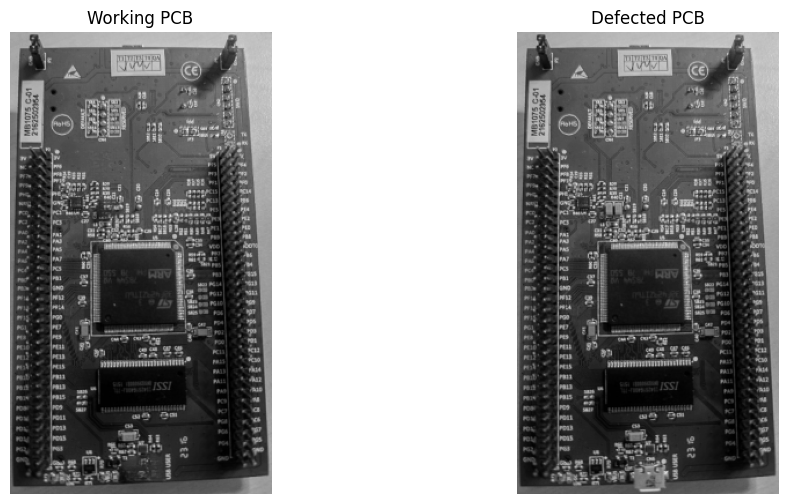

In [6]:
gray_test_img = cv.cvtColor(test_img,cv.COLOR_BGR2GRAY)
gray_template_img = cv.cvtColor(template_img,cv.COLOR_BGR2GRAY)

showim([gray_test_img, gray_template_img], ['Working PCB', 'Defected PCB'])

In order to understand the distribution of the images pixel values, let's see the it's Histrogram:

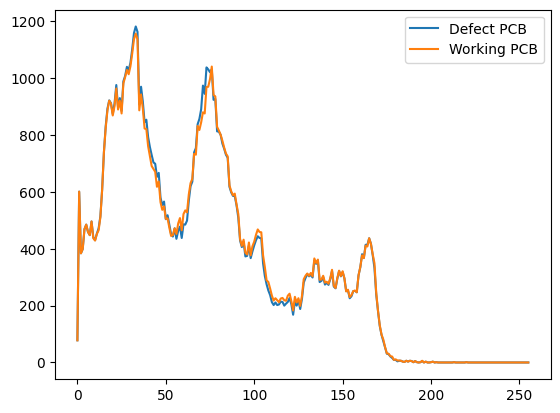

In [7]:
hist_test = cv.calcHist([gray_test_img],[0],None,[256],[0,256])
hist_template = cv.calcHist([gray_template_img],[0],None,[256],[0,256])

bins = np.linspace(0, 255, 255)

plt.plot(hist_test, label='Defect PCB')
plt.plot(hist_template, label='Working PCB')
plt.legend()
plt.show()

As we can see, the two images are pretty close, even tho we know for sure that are some defects in the defected image.

Now let's use a median blur filter.

We use median blur on image for the following reasons:

1. Noise Reduction: Images often contain various types of noise, such as salt-and-pepper noise or Gaussian noise, which can negatively impact feature extraction. Median blur is effective in reducing this type of noise because it replaces each pixel's value with the median value of its neighborhood. Median filtering is particularly good at preserving edges and fine details while removing noise, which is essential for accurate feature extraction.

2. Outlier Removal: In some cases, images may contain outliers or extreme pixel values that are not representative of the underlying features of the image. Median filtering helps in removing these outliers, ensuring that the features extracted are more robust and reliable.

3. Enhancing Salient Features: Median blur can enhance the visibility of certain salient features in an image. It can make edges and texture patterns more pronounced, which can be beneficial for feature extraction algorithms that rely on the presence of these features.

4. Improved Segmentation: In tasks like object segmentation, where the goal is to separate objects from the background, median blur can help create smoother boundaries and reduce the impact of noise, leading to more accurate segmentation results.

5. Enhanced Feature Extraction: When feature extraction methods, such as edge detection or corner detection, are applied to an image with noise, they can often detect spurious features or exhibit higher variability in their results. Median blur can lead to more stable and consistent feature extraction outcomes.

2


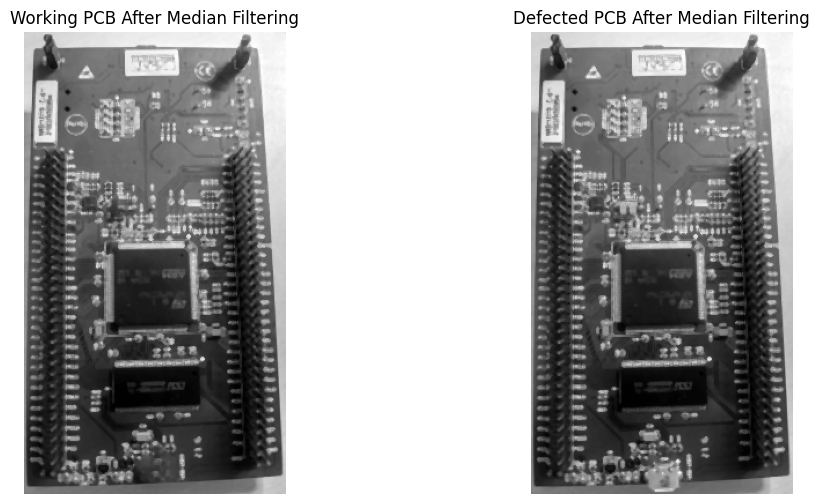

In [8]:
med_test = cv.medianBlur(gray_test_img,3)
med_template = cv.medianBlur(gray_template_img,3)

showim([med_test, med_template], ['Working PCB After Median Filtering', 'Defected PCB After Median Filtering'])

Now let's apply gaussian blur filter on our images:

We apply gaussian blur in order to:

1. Further Noise Reduction: While median blur is effective at removing certain types of noise (e.g., salt-and-pepper noise), it may not eliminate all types of noise, especially smooth, continuous noise like Gaussian noise. Gaussian blur is designed to reduce this type of noise by smoothing the image. By convolving the image with a Gaussian kernel, it reduces high-frequency variations, making the image less sensitive to small-scale noise.

2. Scale-Space Representation: Gaussian blur is often used as part of a scale-space representation, where multiple versions of an image are generated with varying degrees of blurring. This scale-space representation helps in detecting features and structures at different scales in the image. This can be beneficial for tasks like object detection and image pyramid construction.

3. Edge Preservation: While Gaussian blur smooths an image, it tends to preserve the underlying structure and edges to a certain extent. This property is important when you want to maintain the overall shape and structure of objects in the image while reducing noise.

4. Improved Feature Detection: In some cases, feature extraction methods, such as corner detection or blob detection, may benefit from a slightly smoothed image. This smoothing can help in better defining the characteristics of the features, making them more robust and less sensitive to minor variations in the image.

5. Preparation for Subsequent Processing: Gaussian blur can be used as a preprocessing step to make the image more suitable for subsequent processing steps. For example, it can make the image more amenable to edge detection, texture analysis, or segmentation by reducing noise and enhancing the salient features.

2


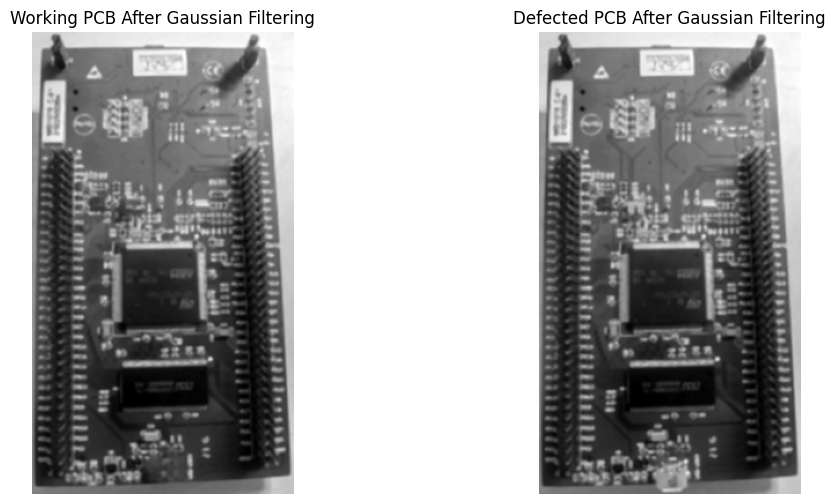

In [9]:
gaus_test = cv.GaussianBlur(med_test,ksize=(3,3),sigmaX=1)
gaus_template = cv.GaussianBlur(med_template,ksize=(3,3),sigmaX=1)

showim([gaus_test, gaus_template], ['Working PCB After Gaussian Filtering', 'Defected PCB After Gaussian Filtering'])

After we applied median and gaussian filters, let's check how the histogram looks:

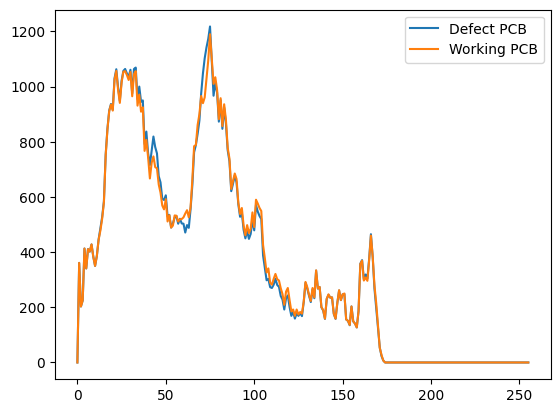

In [10]:
hist_blur_test = cv.calcHist([gaus_test],[0],None,[256],[0,256])
hist_blur_template = cv.calcHist([gaus_template],[0],None,[256],[0,256])

bins = np.linspace(0, 255, 255)

plt.plot(hist_blur_test, label='Defect PCB')
plt.plot(hist_blur_template, label='Working PCB')
plt.legend()
plt.show()

let's see the histrogram before applying the filters and after:

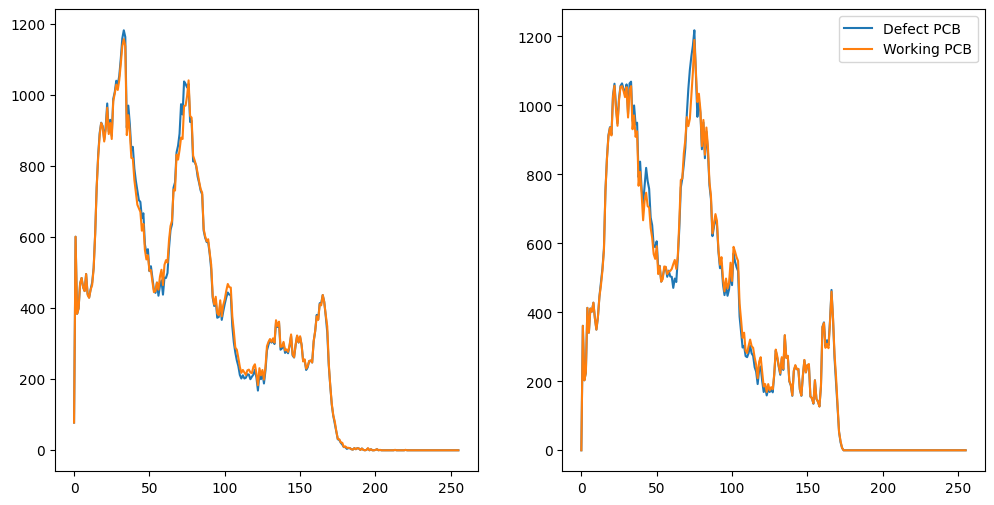

In [11]:
f, ax = plt.subplots(1,2,figsize=(12,6))

ax[0].plot(hist_test, label='Defect PCB')
ax[0].plot(hist_template, label='Working PCB')
ax[1].plot(hist_blur_test, label='Defect PCB')
ax[1].plot(hist_blur_template, label='Working PCB')
plt.legend()
plt.show()

In [34]:
# Define the image dimensions
width = 226
height = 400

# Create a white image
image = np.ones((height, width), dtype=np.uint8)

# Set the first 300 pixels in the height to white
image[0:300, :] = 0

# Save the image to a file or display it
cv.imwrite('output_image.png', image)

# Display the image (optional)
cv.imshow('Image', image)
cv.waitKey(0)
cv.destroyAllWindows()

In [35]:
print(image)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


1


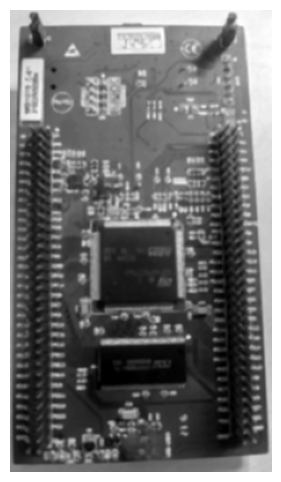

In [33]:
showim([gaus_test])

1


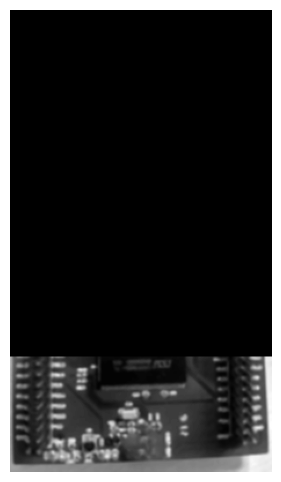

In [37]:
gaus_test2 = gaus_test + 1
new_img = gaus_test2 * image

_, binary_image = cv.threshold(new_img, 128, 255, cv.THRESH_BINARY)
showim([new_img])

In [ ]:
mask = np.full((height, width), 255, dtype=np.uint8)

In [17]:
gaus_test.shape
med_template.shape

(400, 226)

2


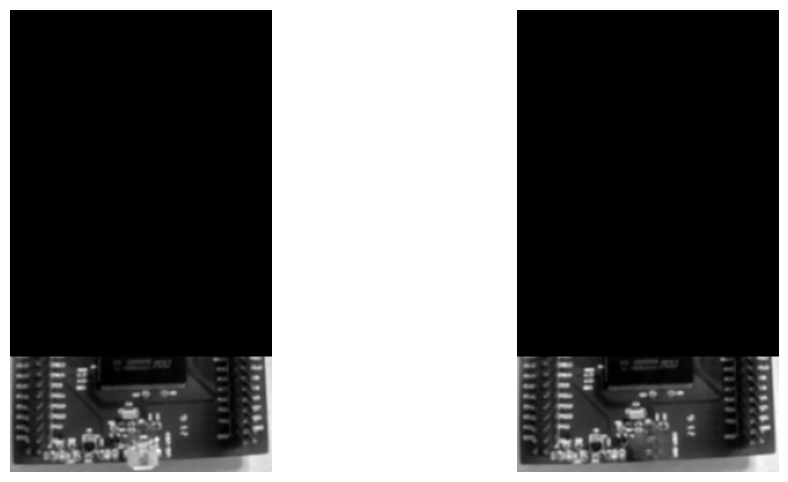

In [39]:
gaus_test_masked = gaus_test + 1
gaus_template_masked = gaus_template + 1

gaus_test_masked = gaus_test * image
gaus_template_masked = gaus_template * image

showim([gaus_template_masked, gaus_test_masked])

### Feature Extraction:

2


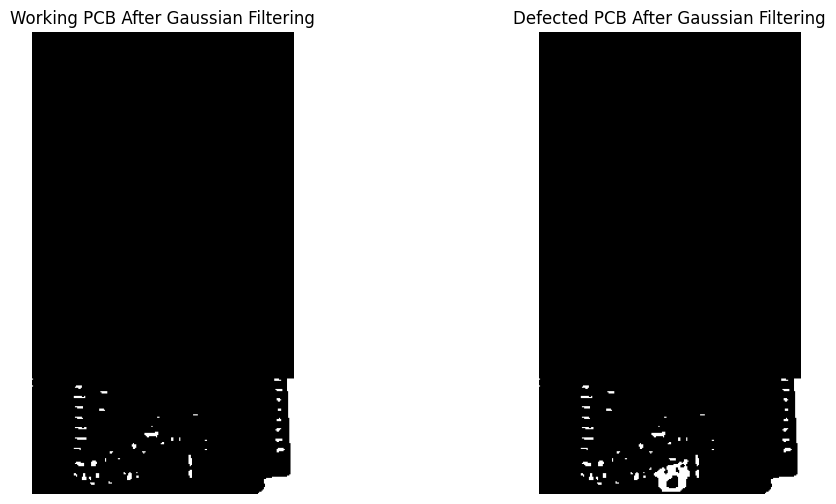

In [40]:
usb_test = cv.inRange(gaus_test_masked,100,170)
usb_template = cv.inRange(gaus_template_masked,100,170)

showim([usb_test, usb_template], ['Working PCB After Gaussian Filtering', 'Defected PCB After Gaussian Filtering'])

2


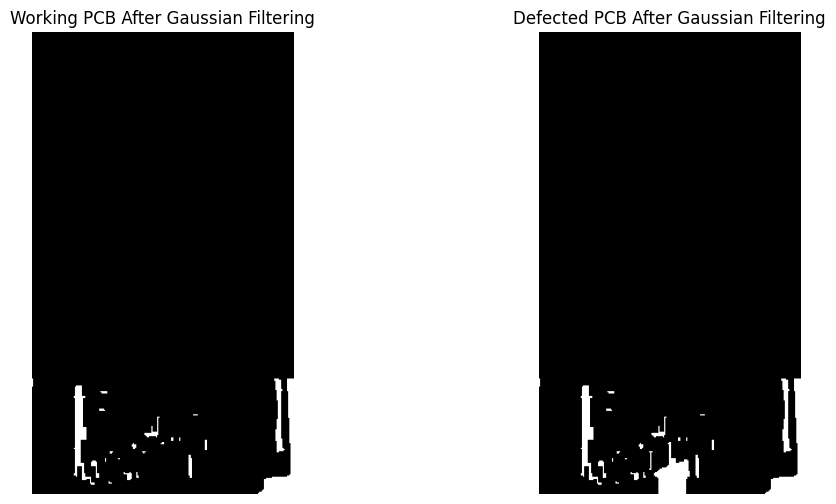

In [41]:
kernel = np.ones((13,3))
close_sold_test = cv.morphologyEx(usb_test, cv.MORPH_CLOSE, kernel)
close_sold_template = cv.morphologyEx(usb_template, cv.MORPH_CLOSE, kernel)

showim([close_sold_test, close_sold_template], ['Working PCB After Gaussian Filtering', 'Defected PCB After Gaussian Filtering'])

2


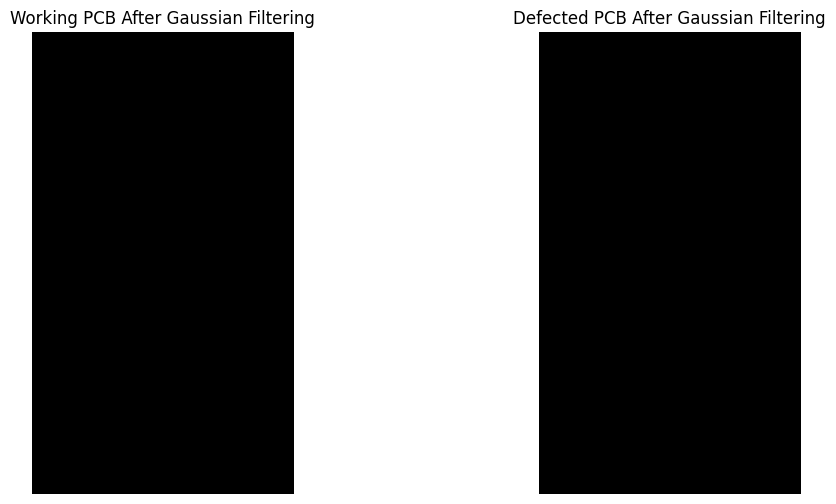

In [50]:
sold_test_fill = close_sold_test.copy()
sold_template_fill = close_sold_template.copy()

h, w = sold_test_fill.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
cv.floodFill(sold_test_fill, mask, (0,0), 255);
hole_test = cv.bitwise_not(sold_test_fill)

h, w = sold_template_fill.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
cv.floodFill(sold_template_fill, mask, (0,0), 255);
hole_template = cv.bitwise_not(sold_template_fill)

showim([hole_test, hole_template], ['Working PCB After Gaussian Filtering', 'Defected PCB After Gaussian Filtering'])

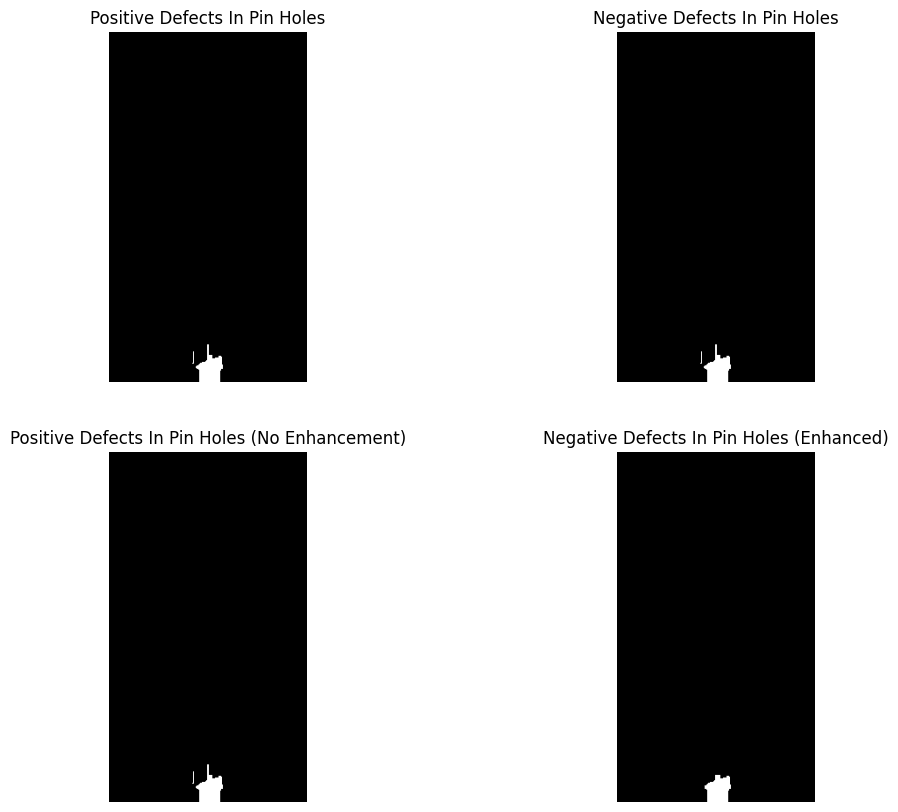

In [51]:
pd_hole = close_sold_test - close_sold_template
nd_hole = close_sold_template - close_sold_test

kernel = np.ones((3,3))
open_nd_hole = cv.morphologyEx(nd_hole, cv.MORPH_OPEN, kernel)

f, ax = plt.subplots(2,2,figsize=(12,10))
ax[0][0].imshow(pd_hole,cmap='gray')
ax[0][0].axis('off')
ax[0][0].title.set_text('Positive Defects In Pin Holes')

ax[0][1].imshow(nd_hole,cmap='gray')
ax[0][1].axis('off')
ax[0][1].title.set_text('Negative Defects In Pin Holes')

ax[1][0].imshow(pd_hole,cmap='gray')
ax[1][0].axis('off')
ax[1][0].title.set_text('Positive Defects In Pin Holes (No Enhancement)')

ax[1][1].imshow(open_nd_hole,cmap='gray')
ax[1][1].axis('off')
ax[1][1].title.set_text('Negative Defects In Pin Holes (Enhanced)')

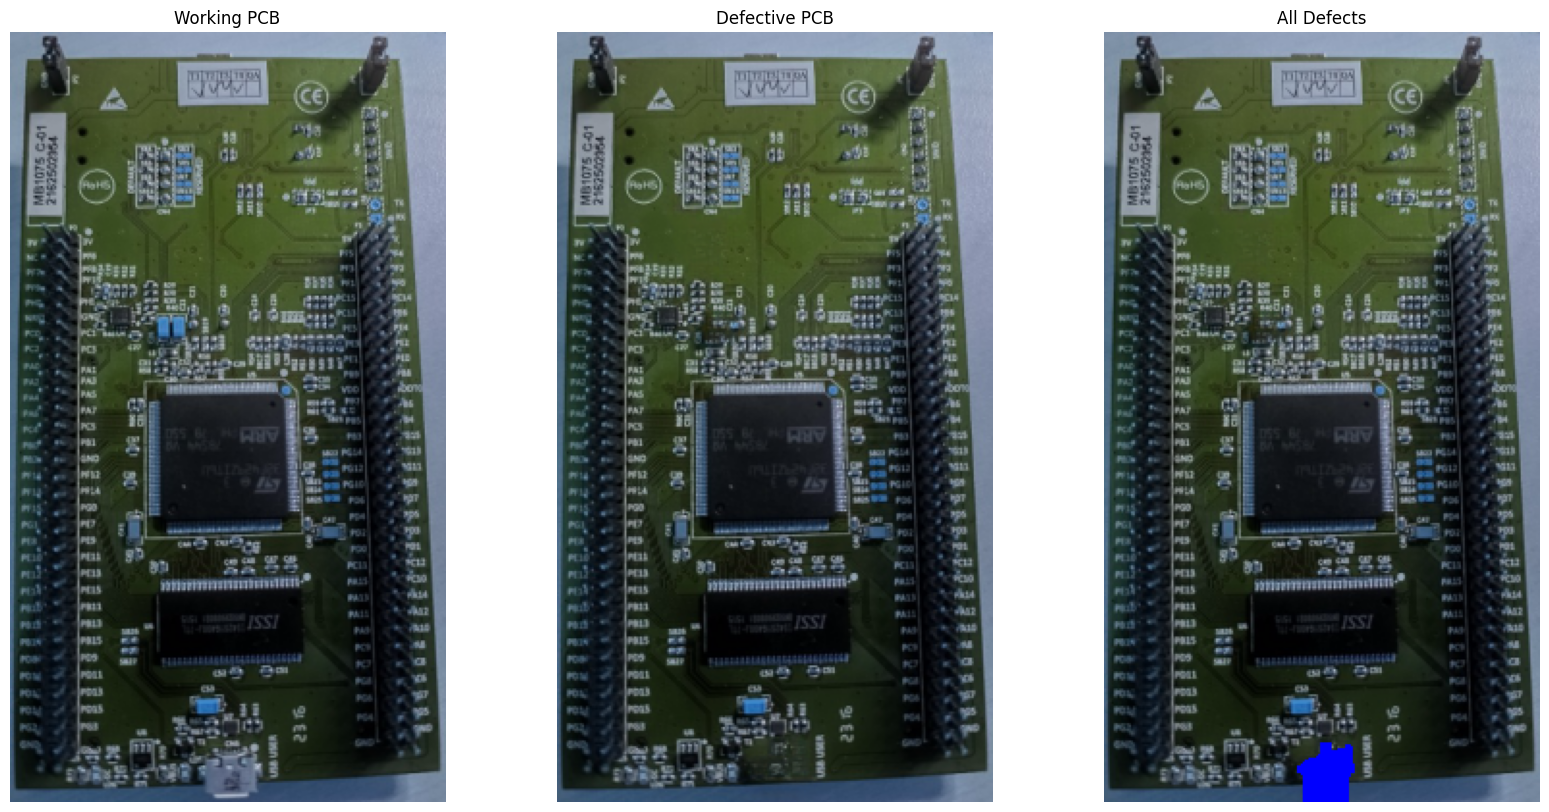

In [52]:
defects = test_img.copy()


defects[pd_hole == 255] = [0, 0, 255]


defects[open_nd_hole == 255] = [255, 0, 0]

f, ax = plt.subplots(1,3,figsize=(20,10))

ax[0].imshow(cv.cvtColor(template_img,cv.COLOR_BGR2RGB))
ax[0].axis('off')
ax[0].title.set_text('Working PCB')

ax[1].imshow(cv.cvtColor(test_img,cv.COLOR_BGR2RGB))
ax[1].axis('off')
ax[1].title.set_text('Defective PCB')

ax[2].imshow(cv.cvtColor(defects,cv.COLOR_BGR2RGB))
ax[2].axis('off')
ax[2].title.set_text('All Defects')

After we applied the median blur filter we can try to exract out features from the image:

In [17]:
# Define the dimensions of the image
image_height, image_width = (408, 720)

# Define the region of interest (ROI) in the bottom portion of the image
bottom_roi_height = 500  # Adjust the height of the ROI as needed
bottom_roi = gaus_test[image_height - bottom_roi_height:, :]

# Thresholding to create a binary mask for the bottom ROI
lower_threshold = 100  # Adjust the lower threshold as needed
upper_threshold = 170  # Adjust the upper threshold as needed
usb_mask = cv.inRange(bottom_roi, lower_threshold, upper_threshold)

# Find contours in the binary mask
usb_contours, _ = cv.findContours(usb_mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Create a copy of the original image
result_image = gaus_test.copy()

# Draw the USB regions on the result image
cv.drawContours(result_image, usb_contours, -1, (0, 255, 0), 2)  # Green for USB

# Display the result
cv.imshow('Result', result_image)
cv.waitKey(0)
cv.destroyAllWindows()
